## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import Normalizer

## Agglomerative Hierarchical Clustering

### Read File

In [7]:
data = pd.read_csv('data.csv')
numeric_data = data[['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence','popularity', 'tempo', 'liveness', 'loudness', 'speechiness', 'year']]
# create a subset with only 25000 randomly sampled points for algorithms with big memory requirements
numeric_data_subset = numeric_data.loc[np.random.choice(numeric_data.index, 25000, replace=False)]

### Find Correlation Between Numeric Features

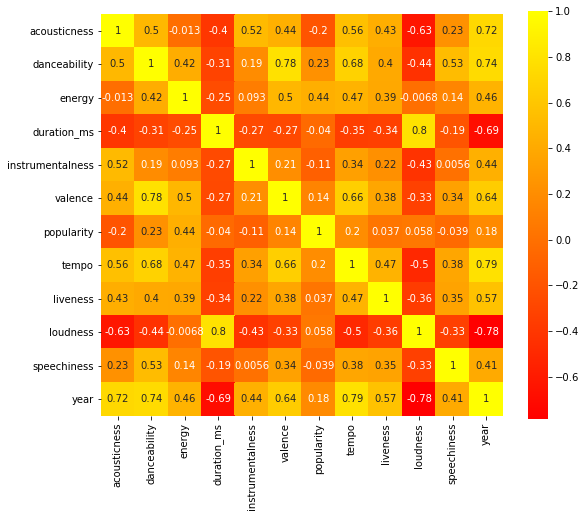

In [42]:
cor = pd.DataFrame(Normalizer().fit_transform(numeric_data)).corr(method='pearson')
labels = ['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence','popularity', 'tempo', 'liveness', 'loudness', 'speechiness', 'year']
plt.figure(figsize=(9,7.5))
sns.heatmap(cor, square = True, annot=True, yticklabels=labels, xticklabels=labels, cmap=plt.cm.autumn)
plt.show()

TODO: Interpret results here (e.g. The highest correlation exists between duration_ms and loudness.)

### Cluster Data and Plot Dendrogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0]],
 'dcoord': [[0.0, 1319136.39514213, 1319136.39514213, 0.0],
  [0.0, 1954941.972697822, 1954941.972697822, 0.0],
  [1319136.39514213, 4428263.609247202, 4428263.609247202, 1954941.972697822],
  [0.0, 1765734.6647975873, 1765734.6647975873, 0.0],
  [0.0, 1867940.4639270827, 1867940.4639270827, 0.0],
  [1765734.6647975873,
   4428558.390989136,
   4428558.390989136,
   1867940.4639270827],
  [4428263.609247202, 9809899.683087604, 9809899.683087604, 4428558.390989136],
  [0.0, 1704257.2840285562, 1704257.2840285562, 0.0],
  [0.0, 2206396.4794336

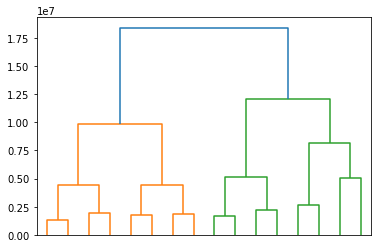

In [8]:
# This code is just to display the dendogram visualization. The real clustering occurs in the next box.
clustering = linkage(numeric_data_subset, method='ward')
dendrogram(clustering, truncate_mode='level', p=3, no_labels=True)

### Visualization of Clusters

In [9]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(numeric_data_subset)

Text(0, 0.5, 'loudness')

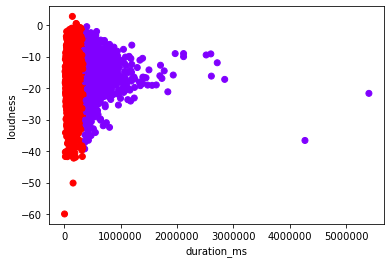

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(numeric_data_subset['duration_ms'], numeric_data_subset['loudness'], c=clustering.labels_, cmap='rainbow')
ax.set_xlabel('duration_ms')
ax.set_ylabel('loudness')